# [Введение в Pandas](https://stepik.org/lesson/681964/)

Эта тетрадка поможет разобраться вам в основных моментах предварительной обработки данных в Pandas, познакомиться с полезными функциями и трюками. 

### Оглавление ноутбука
<img src="https://sun2.beeline-kz.userapi.com/impg/sH8DAKXIRcSQkiZ119iicN4-8JdSEjH88T1QfQ/53wjU4ABcrI.jpg?size=728x455&quality=96&sign=caed6c5a44eb5b193ed9d8e975558c56&type=album" align="right" width="528" height="528" />
<br>

<p><font size="3" face="Arial" font-size="large">
<ul type="square"><li><a href="#1">Структуры данных в Pandas</a></li><li><a href="#2">Предварительный анализ данных</a><ul><li><a href="#3">Загрузка и первичное знакомство</a></li><li><a href="#4">Предварительный осмотр</a></li><li><a href="#5">Работа с числовыми данными</a></li></ul></li><li><a href="#6">Извлечение необходимой информации</a><ul><li><a href="#7">Сортировка</a></li><li><a href="#8">Методы фильтрации</a></li><li><a href="#9">Работа с пропусками</a></li><li><a href="#10">Индексация данных</a></li><li><a href="#11">Функции</a></li></ul></li>
<li><a href="#12">Практические задачи</a></li></ul></font></p>

# Cтруктуры данных в Pandas

<p id="1"></p>

`Series` — это структура, используемая для работы с последовательностью одномерных данных, а `Dataframe` — более сложная и подходит для нескольких измерений. `Series` – одномерный массив с метками, способный хранить любой тип данных.

<img src="https://sun9-43.userapi.com/impg/0k7fzcgju-6hY10XmQoaJkfxOxr0-SvgA3NHQg/N0Hb-T_fXio.jpg?size=1280x720&quality=96&sign=6ac22e0ff168023b0dff780c1bfa5e36&type=album"></img>

In [59]:
import pandas as pd # pandas для работы с табличными данными
import numpy as np  # numpy для математических действий

`Series` создать можно так:

In [11]:
s = pd.Series(data, index=index, name='something')
s

Метки именуются `index`, данные `data` могут быть любыми, name является именем `Series`.

In [60]:
data = ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog']
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
s = pd.Series(data, index=labels, name='animals')
s

a      cat
b      cat
c    snake
d      dog
e      dog
f      cat
g    snake
h      cat
i      dog
j      dog
Name: animals, dtype: object

Создать `Dataframe` проще из словаря, а качестве подписей строк будем использовать список



In [61]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
         'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
         'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
         'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


А теперь сделаем открытие! Столбы в `DataFrame` являются `Series`!

In [62]:
s = df.age
s

a    2.5
b    3.0
c    0.5
d    NaN
e    5.0
f    2.0
g    4.5
h    NaN
i    7.0
j    3.0
Name: age, dtype: float64

Обращение по адресу по порядку `s[0]`

In [63]:
s[0]

2.5

Элементы по определенным адресам `s[[4, 3, 1]]`



In [64]:
s[[4, 3, 1]]

e    5.0
d    NaN
b    3.0
Name: age, dtype: float64

Срезы `s[:3]`



In [65]:
s[:3]

a    2.5
b    3.0
c    0.5
Name: age, dtype: float64

Идеология словаря при обращении

In [66]:
s['a']

2.5

In [67]:
'e' in s

True

In [68]:
't' in s

False

__Арифметические операции к Series__



In [69]:
s + s

a     5.0
b     6.0
c     1.0
d     NaN
e    10.0
f     4.0
g     9.0
h     NaN
i    14.0
j     6.0
Name: age, dtype: float64

__Логические операции к Series.__ Например, выбрать все значения, больше заданного



In [70]:
s[s > 3]

e    5.0
g    4.5
i    7.0
Name: age, dtype: float64

Функции из модуля numpy применяются поэлементно. Например, экспонента `np.exp(s)`

Количество строк узнать можно так `len(s)`



###   Редактирование таблиц. Создание и удаление столбцов. 


К столбцам `DataFrame` применимы любые математические операции. Надо толькo понимать, как работает векторизация.

Так мы можем присвоить всему столбцу `'visits'` значение 3 и оно автоматические появится в каждой строке:



In [71]:
df['visits'] = 3
df

,animal,age,visits,priority
a,cat,2.5,3,yes
b,cat,3.0,3,yes
c,snake,0.5,3,no
d,dog,NaN,3,yes
e,dog,5.0,3,no
f,cat,2.0,3,no
g,snake,4.5,3,no
h,cat,NaN,3,yes
i,dog,7.0,3,no
j,dog,3.0,3,no


Надо увеличить возраст на год?  Просто увеличиваем столбец `'age'` на единицу. Даже не верится, что все так просто! 



In [72]:
df.age = df.age + 1
df

,animal,age,visits,priority
a,cat,3.5,3,yes
b,cat,4.0,3,yes
c,snake,1.5,3,no
d,dog,NaN,3,yes
e,dog,6.0,3,no
f,cat,3.0,3,no
g,snake,5.5,3,no
h,cat,NaN,3,yes
i,dog,8.0,3,no
j,dog,4.0,3,no


Можем даже создать новый столбец, использую другие столбцы `'age'` и `'visits'`. Казалось бы, всего одна строчка, но применяется для всего столбца! Векторизация это секретная магия pandas =)

Аналогично, можно  вычесть, умножить, разделить и сложить два численных столбца друг с другом.


In [73]:
df['age_visits_sum'] = df.age + df.visits
df

,animal,age,visits,priority,age_visits_sum
a,cat,3.5,3,yes,6.5
b,cat,4.0,3,yes,7.0
c,snake,1.5,3,no,4.5
d,dog,NaN,3,yes,NaN
e,dog,6.0,3,no,9.0
f,cat,3.0,3,no,6.0
g,snake,5.5,3,no,8.5
h,cat,NaN,3,yes,NaN
i,dog,8.0,3,no,11.0
j,dog,4.0,3,no,7.0


Также можем и удалить столбец, не забываем про `inplace=True`.

In [74]:
df.drop('age_visits_sum', axis=1, inplace=True)
df

,animal,age,visits,priority
a,cat,3.5,3,yes
b,cat,4.0,3,yes
c,snake,1.5,3,no
d,dog,NaN,3,yes
e,dog,6.0,3,no
f,cat,3.0,3,no
g,snake,5.5,3,no
h,cat,NaN,3,yes
i,dog,8.0,3,no
j,dog,4.0,3,no


<div class="alert alert-info">
<b>Полезная информация</b>


- __Удаление столбцов или строк__ `df.drop(name, axis=0, inplace=True)`  - Тут name это индекс строки или название колонки. Параметр `axis=0` означает, что удаляется строка, для удаления колонок (столбцов) нужно писать вместо индекса имена колонок списком и ставит `axis=1`.

    
- __Удаление дубликатов строк__ `df.drop_duplicates()` и не забываем про параметр inplace=True. Если надо удалить дубли по конкретному столбцу, что парадаем в метод название или список названий. 

    
    
- __Вставка в заданное место столбца__ `df.insert(loc, column, value)`.  Тут `loc` (куда), `column` (название), `value` (что вставлям). По умолчанию столбцы вставляются в конец.

    
    
- __Переименовать столбец__ можно так `df.rename(columns = {'old_name':'new_name'}, inplace=True)`</div>


# Предварительный анализ данных

<p id="2"></p>

В этой главе вы непосредственно познакомитесь уже с загрузкой данных, первичным осмотром и анализом.

 <img src="https://sun9-46.userapi.com/impg/4yA0_8N5ksJzftOvHsi_niXDlu4Ocy-HyjVj0w/YBBKjZhZsjc.jpg?size=1600x666&quality=96&sign=a6b10953218cb38c8e3042879b20935b&type=album"></img>

## Загрузка и первичное знакомство

<p id="3"></p>

**[pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)** - cчитывает данные в DataFrame из файла csv (файл с разделителями). У метода очень много параметров с которыми нужно ознакомится самостоятельно. 

In [75]:
path = './data/demo_rides_info.csv'
rides_info = pd.read_csv(path)
rides_info

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,q53527020Q,g55775125g,i1O,2020-01-16,3.42,33,324,75,100.298135,0,2.412860e+03,0,-3.828166,-12.577
1,X72952203K,Y-6420899e,Z1i,2020-01-19,4.00,65,839,51,78.000000,0,2.553284e+03,0,-0.166199,-5.850
2,g40994147T,z77468044J,x1M,2020-01-21,6.18,46,363,47,73.000000,2,2.079931e+02,0,-6.904072,0.000
3,E18650750E,W50413234I,W1Y,2020-03-17,1.43,80,955,34,116.000000,2,1.758479e+03,0,3.132158,18.966
4,D18083254C,e-4559210H,U1f,2020-03-21,3.45,142292,2276667,52,64.000000,1,7.541414e+06,0,-29.248641,-8.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,g11939886D,I-9069619f,X1x,2020-03-28,3.90,30,384,31,61.000000,0,9.726349e+02,0,-24.883368,-20.119
49996,P13881472G,T-4233717D,v1s,2020-02-10,2.83,202887,1623091,43,117.316900,1,8.927038e+06,0,6.311743,-7.842
49997,i60157442b,U11495954u,l1U,2020-02-09,7.60,47,369,66,91.763722,0,3.150356e+03,0,-9.265198,9.674
49998,a57837499I,G-5803601t,N1r,2020-01-25,7.16,7,78,34,67.000000,1,1.197659e+02,0,-11.737839,4.371


<div class="alert alert-info"><b>Полезная информация</b>

- Если при чтении файла вы видите столцы с названием типа `Unnamed: 0` , то это сохраненный индекс при записи файла. Можно загрузить индексы из этого столбца не создавая их по умолчанию с нуля с помощью параметра  `index_col=0`, указав номер столбца который нужно использовать для индексов. 

    
- Полезные методы вывода строк: `df.sample(n)` / `df.head(n)` / `df.tail(n)` - возвращает первые, случайные или последние n строк датафрема. Структура `DataFrame` А что это? `DataFrame` – это двумерная структура данных со столбцами потенциально разных типов.

    
- Подсчет числа каждого значения:  `df.value_counts()` - функция используется для получения уникальных значений и числа их встречаемости в виде `Series` . По умолчанию отсортирован по убыванию встречаемости `(ascending=False)`. Можно изменить сортировку через `ascending=True`. Также числовые столбцы можно разбивать на бины через параметр `bins`.  

</div>

## Предварительный осмотр данных

<p id="4"></p>

**[df.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)** - возвращает случайную выборку строк датафрейма. Параметр n - кол-во выводимых строк.  

In [76]:
rides_info.sample(5)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
12045,U17038085p,y31807857l,V1m,2020-03-16,2.64,106,1690,47,75.000000,2,285.568460,0,-9.140320,-10.710
40839,k10615711l,x95423952G,M1Z,2020-01-30,5.75,43,425,70,111.188451,0,2996.384525,0,-4.831653,-38.001
11020,m16402716a,d-1431691v,Z1d,2020-03-07,0.10,51,606,69,141.000000,1,3592.916070,0,-2.858706,-2.607
15050,A38938958p,s-2436543G,t1s,2020-01-04,5.57,160,1273,36,49.000000,17,1990.118048,0,3.964930,7.409
48638,G14384502a,j21109696Z,A1m,2020-02-19,3.80,522,7302,53,66.000000,1,97.144112,0,-22.225319,-25.942


**[df.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)** - возвращает первые строки датафрейма. По умолчаю выводит 5 строк, но можно изменить параметр n и вывести больше.  

Часто используют метод `head()`, но лучше первый раз смотреть на датафрейм через `sample()`.
Так вы имеете возможность смотреть на разные выборки и это может быть полезно, чтобы увидеть какие-нибудь баги.

In [77]:
rides_info.head()

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,q53527020Q,g55775125g,i1O,2020-01-16,3.42,33,324,75,100.298135,0,2.412860e+03,0,-3.828166,-12.577
1,X72952203K,Y-6420899e,Z1i,2020-01-19,4.00,65,839,51,78.000000,0,2.553284e+03,0,-0.166199,-5.850
2,g40994147T,z77468044J,x1M,2020-01-21,6.18,46,363,47,73.000000,2,2.079931e+02,0,-6.904072,0.000
3,E18650750E,W50413234I,W1Y,2020-03-17,1.43,80,955,34,116.000000,2,1.758479e+03,0,3.132158,18.966
4,D18083254C,e-4559210H,U1f,2020-03-21,3.45,142292,2276667,52,64.000000,1,7.541414e+06,0,-29.248641,-8.126


<div class="alert alert-info">
    <b>Выводы</b>
    <ul>
    <li>в целом данные загрузились</li>
    <li>названия столбцов из первой строки загружены</li>
    <li>индексы первого столбца выглядят адекватно</li>
    <li>наличие индексов, которые нужно удалить не обнаружено</li>
    <li>по случайным пяти строкам наличие каких-либо ошибок не обнаружено</li></ul>
</div>

***[df.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)*** - Выводит краткую сводку информацию по датафрейму.  

В нашем случае датафрейм небольшой, но он может быть большим. Мы разберем методы библиотеки Pandas. а этом небольшом примере, которые вы по аналогии самостоятельно сможете применить к другим датасетам

In [78]:
rides_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            50000 non-null  object 
 1   car_id             50000 non-null  object 
 2   ride_id            50000 non-null  object 
 3   ride_date          50000 non-null  object 
 4   rating             50000 non-null  float64
 5   ride_duration      50000 non-null  int64  
 6   ride_cost          50000 non-null  int64  
 7   speed_avg          50000 non-null  int64  
 8   speed_max          49747 non-null  float64
 9   stop_times         50000 non-null  int64  
 10  distance           50000 non-null  float64
 11  refueling          50000 non-null  int64  
 12  user_ride_quality  49841 non-null  float64
 13  deviation_normal   50000 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 5.3+ MB


<div class="alert alert-info"><b>Выводы</b>
    <ul>
    <li>в датафрейме 14 столбцов</li>
    <li>четыре из них имеют тип object</li>
    <li>пять из них имеют тип float64</li>
    <li>пять столбцов имеют тип int64</li>
    <li>всего в датафрейме 50000 строк</li>
    <li>объем занимаемый датафреймом 5.3+ MB (эта информация может быть полезна, чтобы заранее представить какие операции с датафреймом вы сможете выполнять с учетом доступной вам оперативной памяти)</li></ul>
    </div>

  

***[df.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)*** - Выводит метки столбцов датафрейма.  

Иногда кол-во столбцов очень большое, так что при выводе они все не помещаются в стандартный вывод через `df.info()`. Тогда можно воспользоваться атрибутом для просмотра индексов названий столбцов.

In [79]:
rides_info.columns

Index(['user_id', 'car_id', 'ride_id', 'ride_date', 'rating', 'ride_duration',
       'ride_cost', 'speed_avg', 'speed_max', 'stop_times', 'distance',
       'refueling', 'user_ride_quality', 'deviation_normal'],
      dtype='object')

Гораздо нагляднее и удобнее работать со списком названий столбцов

In [80]:
column_names = list(rides_info.columns)
column_names, len(column_names)

(['user_id',
  'car_id',
  'ride_id',
  'ride_date',
  'rating',
  'ride_duration',
  'ride_cost',
  'speed_avg',
  'speed_max',
  'stop_times',
  'distance',
  'refueling',
  'user_ride_quality',
  'deviation_normal'],
 14)

<div class="alert alert-info"><b>Выводы</b>
<ul><li>14 столбцов</li>
<li>все названия столбцов в нижнем регистре и не содержат спецсимволов (значит их не нужно переименовывать, чтобы обращаться к ним через точку)</li></ul></div>


## Работа с числовыми данными

<p id="5"></p>

***[df.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)*** - Выводит описательные статистики по числовым столбцам датафрейма. Описательные статистики включают в себя
- `count` - кол-во не пустых значений
- `mean` - среднее арифметическое
- `std` - дисперсия
- `min`, `max` - минимум и максимум
- 25%, 50%, 75% - соотвествующие квартили  


__!!!Bнимание!!!__ из статистик автоматически исключаюися NaN значения, если они есть.  

Выведем такое описание таблицы, округлив значения до второго знака после запятой:

In [81]:
rides_info.describe().round(2)

,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
count,50000.00,50000.00,50000.00,50000.00,49747.00,50000.00,50000.00,50000.0,49841.00,50000.00
mean,4.49,9304.08,117999.44,47.10,77.48,1.34,444872.13,0.0,-0.19,-1.20
std,2.13,35947.59,504330.21,12.65,24.28,2.35,1782500.58,0.0,11.79,19.40
min,0.00,2.00,9.00,25.00,30.00,0.00,3.04,0.0,-59.52,-110.76
25%,3.14,27.00,297.00,38.00,62.00,0.00,784.16,0.0,-6.94,-9.01
50%,4.49,44.00,506.00,46.00,72.00,1.00,1456.72,0.0,0.16,0.00
75%,5.86,69.00,895.00,52.00,86.00,2.00,2265.27,0.0,6.69,6.98
max,10.00,222356.00,10889545.00,100.00,202.46,21.00,18333880.69,1.0,56.53,99.92


<div class="alert alert-info">
    <b>Выводы</b>
    
- описание столбцов датафрема (`speed_avg` - средняя скорость по маршруту такси, `rating` - рейтинг полученный водителем за поездку, `ride_duration` - продолжительность поездки, `ride_cost` - стоимость поездки, `stop_times` - кол-во остановок)
- средняя скорость движения по маршруту по всем поездкам около 40, а максимальная средняя скорость 103. Вероятно этот столбец емеет размерность км/час
- как минимум в половине случаев во время поездки была одна остановка
- максимальный рейтинг около 8 минимум чуть ниже единицы. Более половины всех рейтингов с оценками от 3 до 5. Вероятно размерность этого столбца баллы
- сделать однозначные выводы о размерностях продолжительности и стоимости поездок нельзя, вероятно они были модифицированы и для этого требуется дополнительный анализ и визуализация данных   

</div>

***[df.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)*** - функция используется для получения уникальных значений и числа их встречаемости в виде Series . По умолчанию отсортирован по убыванию встречаемости (`ascending=False`). Можно изменить сортировку через `ascending=True`. Также числовые столбцы можно разбивать на бины через параметр bins.  



In [82]:
rides_info.ride_id.value_counts()[:5]

H1v    34
E1y    34
K1F    33
H1z    33
P1Q    33
Name: ride_id, dtype: int64

Вывод: самый часто встречающийся код маршрута H1v и E1y = 34 поездки 

Посмотрим как распределяется кол-во поездок по рейтингу поездок разбивая его на бины:

In [83]:
rides_info.rating.value_counts(bins=4)

(2.5, 5.0]       21730
(5.0, 7.5]       15101
(-0.011, 2.5]     8761
(7.5, 10.0]       4408
Name: rating, dtype: int64

Вывод: 26% (8761+4408 делить на 18000) поездок с рейтингом ниже 2.5 и выше 7.5



***[.duplicated()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)*** - метод который позволит нам выявить дублирование в данных. Возвращает булевы значения, обозначающие повторяющиеся строки. При этом можно не учитывать некоторые определенные столбцы.

In [133]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

Также можно использовать на определенном столбце/столбцах.

In [134]:
df.duplicated(subset=['brand'])

0    False
1     True
2    False
3     True
4     True
dtype: bool

# Извлечение необходимой информации

<p id="6">Перейдем к самому интересному - непосредственно к анализу полученных данных, познакомимся с методами сортировки, фильтрации и разными функциями.</p>

<img src="https://sun9-41.userapi.com/impg/io095r0KS1Fq4NTHYReNuRTf6DBM1pihDZMPqQ/Xki0IFcFAK8.jpg?size=2536x1150&quality=96&sign=db8f9c09f39dd1417032d06830270d44&type=album"></img>

## Сортировка DataFrame

<p id="7">DataFrame можно сортировать. Посмотрим как это можно делать.</p>


__По значениям__

In [84]:
df.sort_values(by='age') 

,animal,age,visits,priority
c,snake,1.5,3,no
f,cat,3.0,3,no
a,cat,3.5,3,yes
b,cat,4.0,3,yes
j,dog,4.0,3,no
g,snake,5.5,3,no
e,dog,6.0,3,no
i,dog,8.0,3,no
d,dog,NaN,3,yes
h,cat,NaN,3,yes


__По индексу__

In [85]:
df.sort_index(axis=1, ascending=False)

,visits,priority,animal,age
a,3,yes,cat,3.5
b,3,yes,cat,4.0
c,3,no,snake,1.5
d,3,yes,dog,NaN
e,3,no,dog,6.0
f,3,no,cat,3.0
g,3,no,snake,5.5
h,3,yes,cat,NaN
i,3,no,dog,8.0
j,3,no,dog,4.0


Параметр `ascending=True` по умолчанию, соответственно сортируется по возрастанию. Если нужно сортировать по нескольким столбцам, то передается список столбов и список булевых переменных в `ascending`. Параметр `inplace=False` по умолчанию.



## Фильтрация данных

<p id="8">Логические выражения используются для получения подтаблицы с заданными условиями по столбцам.</p>

Рассмотрим примеры.



In [86]:
df.loc[df.visits > 2]

,animal,age,visits,priority
a,cat,3.5,3,yes
b,cat,4.0,3,yes
c,snake,1.5,3,no
d,dog,NaN,3,yes
e,dog,6.0,3,no
f,cat,3.0,3,no
g,snake,5.5,3,no
h,cat,NaN,3,yes
i,dog,8.0,3,no
j,dog,4.0,3,no


Если условий больше одного, то условия фильтрации записываются в круглых скобках!

- __'И'__ обозначается как __&__
- __'ИЛИ'__  обозначается как __|__

In [87]:
df.loc[(df.visits > 2) & (df.priority == 'yes')]

,animal,age,visits,priority
a,cat,3.5,3,yes
b,cat,4.0,3,yes
d,dog,NaN,3,yes
h,cat,NaN,3,yes


In [88]:
df.loc[(df.visits > 2) | (df.age > 5)]

,animal,age,visits,priority
a,cat,3.5,3,yes
b,cat,4.0,3,yes
c,snake,1.5,3,no
d,dog,NaN,3,yes
e,dog,6.0,3,no
f,cat,3.0,3,no
g,snake,5.5,3,no
h,cat,NaN,3,yes
i,dog,8.0,3,no
j,dog,4.0,3,no


Как нам вывести часть датафрейма с дешевыми ценами (цены поездки ниже 500), попробуем просто записать это условие и вывести часть датафрейма, которая соответствует этому условию 

In [89]:
rule_cheap = rides_info.ride_cost < 500
rides_info[rule_cheap].head().round(2)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,q53527020Q,g55775125g,i1O,2020-01-16,3.42,33,324,75,100.30,0,2412.86,0,-3.83,-12.58
2,g40994147T,z77468044J,x1M,2020-01-21,6.18,46,363,47,73.00,2,207.99,0,-6.90,0.00
6,j17924049w,g10190493K,e1F,2020-03-15,3.80,33,426,56,121.03,0,1854.43,0,-21.87,-20.00
11,N20390973B,T12315854s,g1g,2020-03-18,8.59,27,372,48,66.00,1,1061.04,0,-9.69,-18.86
12,x37836441s,o-5998359x,W1M,2020-01-05,7.88,14,177,38,46.00,2,470.41,0,7.31,2.39


Видно, что в выборку попали строки с индексом 0 и 2 (значения строк в столбце ride_cost 324 и 363 соответственно ).


### Булева маска

Также одним из самых простых способов отфильтровать нужные строки, это добавить булевую маску. Пусть маска строится по условию, что стоимость поездки больше некоторого значения.

- Создаем булеву маску  `[True, False, True, ...]`
- Выводим первые 5 значений строк, подходящих под условие

In [90]:
rule_cheap = rides_info['ride_cost'] < 426  
rides_info[rule_cheap].head()      

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,q53527020Q,g55775125g,i1O,2020-01-16,3.42,33,324,75,100.298135,0,2412.859858,0,-3.828166,-12.577
2,g40994147T,z77468044J,x1M,2020-01-21,6.18,46,363,47,73.000000,2,207.993094,0,-6.904072,0.000
11,N20390973B,T12315854s,g1g,2020-03-18,8.59,27,372,48,66.000000,1,1061.035898,0,-9.692375,-18.856
12,x37836441s,o-5998359x,W1M,2020-01-05,7.88,14,177,38,46.000000,2,470.414162,0,7.314068,2.389
16,v23018580U,J-9977061N,e1v,2020-02-18,5.01,30,415,35,80.000000,0,1045.715427,0,-5.538496,18.364


Если мы хотим добавить новый столбец `cheap_price` - характеристика дешевой цены поездки: если цена в первом 25% квартиле (то есть меньше 426) то это будет дешевая цена `Yes`, иначе `No`.

In [91]:
rule_cheap = rides_info.ride_cost < 426
rides_info.loc[rule_cheap, 'cheap_price'] = 'Yes'
rides_info.head().round(2)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,cheap_price
0,q53527020Q,g55775125g,i1O,2020-01-16,3.42,33,324,75,100.3,0,2412.86,0,-3.83,-12.58,Yes
1,X72952203K,Y-6420899e,Z1i,2020-01-19,4.00,65,839,51,78.0,0,2553.28,0,-0.17,-5.85,NaN
2,g40994147T,z77468044J,x1M,2020-01-21,6.18,46,363,47,73.0,2,207.99,0,-6.90,0.00,Yes
3,E18650750E,W50413234I,W1Y,2020-03-17,1.43,80,955,34,116.0,2,1758.48,0,3.13,18.97,NaN
4,D18083254C,e-4559210H,U1f,2020-03-21,3.45,142292,2276667,52,64.0,1,7541414.25,0,-29.25,-8.13,NaN


### Методы `.filter()` и `.query()`


Выбор строк или столбцов



In [92]:
df.filter(items=['a', 'j'], axis=0)

,animal,age,visits,priority
a,cat,3.5,3,yes
j,dog,4.0,3,no


__Пояснение__

Этот метод также имеет параметр `like`. Он отбирает строки / столбцы, в названии которых есть подстрока, присвоенная ему. Параметры `items` и `like` взаимоисключающие.



In [93]:
df.filter(like='a', axis=1)

,animal,age
a,cat,3.5
b,cat,4.0
c,snake,1.5
d,dog,NaN
e,dog,6.0
f,cat,3.0
g,snake,5.5
h,cat,NaN
i,dog,8.0
j,dog,4.0


__Фильтрация__ альтернативным способом делается



In [94]:
df.query('age > visits')

,animal,age,visits,priority
a,cat,3.5,3,yes
b,cat,4.0,3,yes
e,dog,6.0,3,no
g,snake,5.5,3,no
i,dog,8.0,3,no
j,dog,4.0,3,no


__Пояснение__

Если в запросе необходимо использовать переменную, например, `mean_age` то перед ней пишем `@`

`df.query('age > @mean_age')`

Можно использовать сложные запросы с __'И'__ обозначается как `&`, __'ИЛИ'__  обозначается как `|`.

`df.query('age > @mean_age' | animal == 'cat')`




Метод ***[.concat()](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)*** позволяет объединять объекты pandas вдоль определенной оси. Например `Series` и `DataFrame`

In [130]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

Также есть возможность задавать индексы и лэйблы.

In [131]:
pd.concat([s1, s2], keys=['s1', 's2'],
          names=['Series name', 'Row ID'])







Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object

Пример соединения `DataFrame`.

In [132]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1



df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df2



pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


### Другие полезные для предобработки данных 

<img src="https://sun9-28.userapi.com/impg/AGkQU0bUd1KaDKV0qQkuA0fgwGDPE2ZzAfkXgA/nUokhcix3Zw.jpg?size=2072x546&quality=96&sign=072bc2754c9570d78c470a2fe73c548a&type=album"></img>

__Метод s.isin()__ - это один из самых полезных способов создать булевую маску для фильтрации

In [7]:
car2stay = ['g55775125g', 'Y-6420899e', 'z77468044J']
mask = rides_info['car_id'].isin(car2stay)

In [8]:
rides_info[mask]

In [ ]:
rides_info[~mask]

## Работа с пропущенными значениями

<p id="9"></p>

Pandas для представления отсутствующих данных использует значение из numpy `np.nan`. По умолчанию оно не включается в вычисления. Где хранятся `np.nan`  показывает `df.isna()` оно же `df.isnull()`



In [95]:
df.isnull()

,animal,age,visits,priority
a,False,False,False,False
b,False,False,False,False
c,False,False,False,False
d,False,True,False,False
e,False,False,False,False
f,False,False,False,False
g,False,False,False,False
h,False,True,False,False
i,False,False,False,False
j,False,False,False,False


__Замечание__

По умолчанию некоторые параметры - этого метода следующие 

- `axis=0`  0 удаляет строки, содержащие пропущенные значения, 1 удаляет столбцы.
- `how='any'` `'any'` если хотя бы одно `NA`, удаляет эту строку или столбец, `'all'` только если все значения `NA`
- `inplace=False` False выполняет операцию и возвращает копию объекта, True выполняет операцию на месте и возвращает `None`


In [96]:
df.dropna()

,animal,age,visits,priority
a,cat,3.5,3,yes
b,cat,4.0,3,yes
c,snake,1.5,3,no
e,dog,6.0,3,no
f,cat,3.0,3,no
g,snake,5.5,3,no
i,dog,8.0,3,no
j,dog,4.0,3,no


Вжух, и все пропущенные значения исчезли! Однако, не забывайте про параметр `inplace=True` иначе ваши изменения не сохранятся. 



Заполняет пропущенные значения `df.fillna(n)` при n равном 5 имеем

In [97]:
df.fillna(5)

,animal,age,visits,priority
a,cat,3.5,3,yes
b,cat,4.0,3,yes
c,snake,1.5,3,no
d,dog,5.0,3,yes
e,dog,6.0,3,no
f,cat,3.0,3,no
g,snake,5.5,3,no
h,cat,5.0,3,yes
i,dog,8.0,3,no
j,dog,4.0,3,no


По умолчанию некоторые параметры этого метода следующие

- `axis=None` 0 заполняет по строкам, 1 заполняет по столбцам

- `inplace=False` False выполняет операцию и возвращает копию объекта, True выполняет операцию на месте и возвращает None





Количество пропусков в каждом столбце

In [98]:
df.isna().sum()

animal      0
age         2
visits      0
priority    0
dtype: int64

`df.fillna()` - Заполняет значения NA/NaN. Параметр `inplace=True` заполняет в датафрейме без необходимости копирования. По умолчанию `inplace=False`.


## Основы индексации данных


<p id="10"></p>

**[df.loc[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)** - Обеспечивает доступ к группе строк и столбцов по меткам (индексам) или логическому массиву. Обратите внимание, что, в отличие от обычных срезов Python, включены как начало, так и конец индексов. Через этот метод можно менять значения датафрейма.

<img src="https://sun2.beeline-kz.userapi.com/impg/I6sVsItmqvdhZODJ94ZFdwfvlYN3MMl7f5mDwQ/XmpQ6c34FX0.jpg?size=1646x732&quality=96&sign=1fe5b434040e4ad6cd7265352d10a4a3&type=album"></img>

Также, выбрать столбец можно как `df.col`, где col это имя столбца, если имя столбца написано латиницей и не содержит пробелов. На примерах это будет выглядеть так:  

In [99]:
df.animal

a      cat
b      cat
c    snake
d      dog
e      dog
f      cat
g    snake
h      cat
i      dog
j      dog
Name: animal, dtype: object

In [100]:
df.loc['a', ['animal', 'visits']]

animal    cat
visits      3
Name: a, dtype: object

In [101]:
df.iloc[:,0]

a      cat
b      cat
c    snake
d      dog
e      dog
f      cat
g    snake
h      cat
i      dog
j      dog
Name: animal, dtype: object

In [102]:
df.iloc[[1, 3], [0]]

,animal
b,cat
d,dog


Наглядно это выглядит так

<img src="https://sun9-79.userapi.com/impg/p0NrZ2Owypd4NbKQV4--0kZYi4PfNqk3E31URQ/7NTTharc5XA.jpg?size=301x129&quality=96&sign=36a4edc1d86f1b6618a80545f36cf4ef&type=album"></img>

__Разница между `iloc` и `loc` простая!__   `.loc`- возвращает строку по номеру, `.iloc` по индексу



### Фокусы с индексами


Сбрасывает индекс `df.reset_index()`


In [103]:
df.reset_index()

,index,animal,age,visits,priority
0,a,cat,3.5,3,yes
1,b,cat,4.0,3,yes
2,c,snake,1.5,3,no
3,d,dog,NaN,3,yes
4,e,dog,6.0,3,no
5,f,cat,3.0,3,no
6,g,snake,5.5,3,no
7,h,cat,NaN,3,yes
8,i,dog,8.0,3,no
9,j,dog,4.0,3,no


Устанавливает индекс `df.set_index()`. Соответственно, берет существующий столбец и переводит его в индекс.



Заменяет индекс `df.reindex()`



In [104]:
df.reindex(['j', 'i', 'h', 0, 1, 2], axis=0, fill_value=5)

,animal,age,visits,priority
j,dog,4.0,3,no
i,dog,8.0,3,no
h,cat,NaN,3,yes
0,5,5.0,5,5
1,5,5.0,5,5
2,5,5.0,5,5


Параметр `fill_value` отвечает за заполнение пропущенных значений


Так неудобно сравнивать два столбца, давайте передвинем `cheap_price` к `ride_cost`

In [128]:
cols = ['user_id', 
        'car_id', 
        'ride_id', 
        'ride_date', 
        'rating', 
        'ride_duration',
        'ride_cost',
        'cheap_price',
        'speed_avg',
        'speed_max',
        'stop_times',
        'distance',
        'refueling',
        'user_ride_quality',
        'deviation_normal']

rides_info[cols]

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,cheap_price,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,q53527020Q,g55775125g,i1O,2020-01-16,3.42,33,324,Yes,75,100.298135,0,2.412860e+03,0,-3.828166,-12.577
1,X72952203K,Y-6420899e,Z1i,2020-01-19,4.00,65,839,NaN,51,78.000000,0,2.553284e+03,0,-0.166199,-5.850
2,g40994147T,z77468044J,x1M,2020-01-21,6.18,46,363,Yes,47,73.000000,2,2.079931e+02,0,-6.904072,0.000
3,E18650750E,W50413234I,W1Y,2020-03-17,1.43,80,955,NaN,34,116.000000,2,1.758479e+03,0,3.132158,18.966
4,D18083254C,e-4559210H,U1f,2020-03-21,3.45,142292,2276667,NaN,52,64.000000,1,7.541414e+06,0,-29.248641,-8.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,g11939886D,I-9069619f,X1x,2020-03-28,3.90,30,384,Yes,31,61.000000,0,9.726349e+02,0,-24.883368,-20.119
49996,P13881472G,T-4233717D,v1s,2020-02-10,2.83,202887,1623091,NaN,43,117.316900,1,8.927038e+06,0,6.311743,-7.842
49997,i60157442b,U11495954u,l1U,2020-02-09,7.60,47,369,Yes,66,91.763722,0,3.150356e+03,0,-9.265198,9.674
49998,a57837499I,G-5803601t,N1r,2020-01-25,7.16,7,78,Yes,34,67.000000,1,1.197659e+02,0,-11.737839,4.371


На этом примере видно как можно выводить, изменять срезы датафрема через список необходимых столбцов. Также вы можете использовать встроенную функцию Pandas `.reindex()`

Теперь нам надо заполнить пустые значения NaN значениями `'No'`, воспользуемся методом заполнения пропусков



<p id="11"></p>

## Функции
Применение функции к данным по строкам / столбцам реализуется `df.apply(func, axis=0)`

В примере методу `apply()` передается функция, которая будет применять к данным. Стоит заметить, что строки тоже суммируются.


<img src="https://sun9-70.userapi.com/impg/SfdR2m0D2E02P1xeDa8XJTr2DopfykEufD7Kcw/rQkknfzl800.jpg?size=216x398&quality=96&sign=b395742fb9db51dbeb0e124d17f82901&type=album"></img>

In [106]:
df.apply(np.sum, axis=0)

animal      catcatsnakedogdogcatsnakecatdogdog
age                                       35.5
visits                                      30
priority              yesyesnoyesnononoyesnono
dtype: object

Применение функции к данным поэлементно реализуется `df.applymap(lambda x: func)`

В примере методу `applymap()`  передается `lambda`-функция, которая будет применять к столбцу. Стоит заметить, что строки тоже суммируются.

In [107]:
df.applymap(lambda x: len(str(x)))

,animal,age,visits,priority
a,3,3,1,3
b,3,3,1,3
c,5,3,1,2
d,3,3,1,3
e,3,3,1,2
f,3,3,1,2
g,5,3,1,2
h,3,3,1,3
i,3,3,1,2
j,3,3,1,2


### Встроенные функции

Здесь перечислены некоторые полезные методы, применимые к Series

<img src="https://sun9-17.userapi.com/impg/QIvfQYVUFnOii25XfA6yL9HSsnVaMSI71Ccqow/BROCketQrDw.jpg?size=1302x1068&quality=96&sign=ffe48fa08279d37d7e023cce818f888c&type=album" width=700></img>

In [12]:
!ls ../data

car_info.csv	    demo_driver_info.csv  fix_info.csv	  tmp_car_info.csv
car_test.csv	    demo_fix_info.csv	  rides_info.csv  tmp_driver_info.csv
car_train.csv	    demo_rides_info.csv   solution.csv	  tmp_rides_info.csv
demo_car_train.csv  driver_info.csv	  test_data.csv


In [1]:
import pandas as pd
driver = pd.read_csv('../data/driver_info.csv')
driver.head(2)

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19


In [59]:
fix = pd.read_csv('../data/fix_info.csv')
fix.head(2)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.0,49
1,N-1530212S,LM,2020-2-9 20:25,repair,10.0,48


In [68]:
cars = pd.read_csv('../data/demo_car_train.csv')
cars.head(2)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_1,target_2
0,e-1431476C,Renault Kaptur,standart,petrol,4.84,2014,3856,2017,2,gear_stick
1,L-6578341x,Renault Sandero,standart,petrol,4.84,2011,54093,2018,0,engine_check


In [121]:
rides = pd.read_csv('../data/demo_rides_info.csv')
rides.head(4)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,q53527020Q,g55775125g,i1O,2020-01-16,3.42,33,324,75,100.298135,0,2412.859858,0,-3.828166,-12.577
1,X72952203K,Y-6420899e,Z1i,2020-01-19,4.00,65,839,51,78.000000,0,2553.283971,0,-0.166199,-5.850
2,g40994147T,z77468044J,x1M,2020-01-21,6.18,46,363,47,73.000000,2,207.993094,0,-6.904072,0.000
3,E18650750E,W50413234I,W1Y,2020-03-17,1.43,80,955,34,116.000000,2,1758.478733,0,3.132158,18.966


<p id="12"></p>

# Практические задачи

TODO: 
- Задачи желательно проверять на наших датасетах. 
- Задача проверяла 4 - 8+ каких-то 

In [61]:
driver.head()

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19
2,59,7.8,947,4.0,g11098715c,0,2021-1-15
3,37,7.0,18,4.0,U12618125q,0,2019-11-20
4,39,8.2,428,7.0,A14375829B,0,2019-7-23


## Задача 1 - Изменение и фильтрация

Объект `pd.DataFrame()` помещен в переменную `df`. У объекта есть столбцы `user_id`,`user_rating`, `user_rides`, `age` и `user_time_accident`. 

* Создайте столбец `tripple_accident` из столбца `user_time_accident` умноженного на 3.
* Создайте столбец `rides_on_rating` делением столбца `user_rides` на `user_rating`.
* Выведите часть строк, которых, `user_time_accident` у которых больше `25` (используем фильтрацию)
* Далее оставьте только те строки, у которых `age` выше среднего значения по полученной таблице

В решение запишите в переменную `result`, выведите `user_id` тех строк, которых получились в итоге

__На вход подается:__
`df` - полный DataFrame с исходными данными

__На выходе принимается:__
`Series` 



# your code

In [62]:
df = driver.copy()

df['tripple_accident'] = df['user_time_accident']*3
df['rides_on_rating'] = df['user_rides'] / df['user_rating']
df = df[df['user_time_accident'] > 25]
df = df[df['age'] > df['age'].mean()]
result = df['user_id']

result.shape

(146,)

In [63]:
# path = "https://stepik.org/media/attachments/lesson/779913/Solution.csv"
# pd.read_csv(path)

## Задача 2. Работа с индексами и столбцами

Объект `pd.DataFrame()` помещен в переменную `df`. У объекта есть столбцы `car_id`, `worker_id`, `work_type`,  `fix_date`, `destroy_degree` и `work_duration`. 

* Добавьте новую строку (с индексом `new_index:(int / str)` и значениями `new_data:list`)
* Удалите строки с индексами из списка `del_index_list : list`). 
* Увеличьте значение `destroy_degree` в строке с индексом равным `index` на 1. Переменная `index` содержит индекс строки ИЛИ число (индекс). 
* Удалите столбец `fix_date`, ибо не время сейчас думать о  времени.
* Создайте новый столбец `efficient` , который равен `destroy_degree` деленный на `work_duration`.
* Возведите столбец `work_duration` в квадрат.
* Переименуйте столбец `work_duration` в  `work_duration_squre`.
* Удалить дубликаты по столбцу `car_id`.

Замечание: Предполагается (в тесте), что в датафрейме нет строки с индексом `new_index` , если такая строка есть, то код ее затрет. Последовательность действий важна. Чтобы `new_data` хорошо вставилась ее надо вставлять, до добавления новых столбцов. 

__На вход подается:__

Переменная `df` - с полным DataFrame с исходными данными, переменные - `new_index`, `new_data`, `del_index`, `index`

__На выходе принимается:__ 

Измененный `DataFrame`


In [64]:
#your code
new_index = 145995
new_data = ['new_car_id', 'new_worker_id', 'rapair',  '2019-4-30 11:33', 5, 10 ]
del_index = list(range(0, 146_000, 2))
index = 5

df = fix.copy()

df.loc[new_index] = new_data
df.drop(index = del_index, inplace=True)
df.loc[index, 'destroy_degree'] += 1
df.drop('fix_date', axis=1, inplace=True)
df['efficient'] = df['destroy_degree']/df['work_duration']
df['work_duration'] = df['work_duration']**2
df.rename(columns = {'work_duration' : 'work_duration_squre'}, inplace=True)
df.drop_duplicates('car_id', inplace=True)

result = df['car_id']

result.shape

(2126,)

In [11]:
import pandas as pd
# url = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv'
url = 'https://stepik.org/media/attachments/lesson/681942/Solution.csv'
df = pd.read_csv(url)
df.head()

,car_id,target_class
0,P17494612l,engine_overheat
1,N-1530212S,electro_bug
2,B-1154399t,break_bug
3,F12725233R,gear_stick
4,l-1139189J,electro_bug


In [9]:
tmp = df[(df['user_time_accident'] > 4.5)
   &(df['user_time_accident'] <= 9)
   &(df['age'] < 40)]

# tmp.user_id.isnull().sum()
tmp.shape

(2478, 7)

## Задача 3 Сортировка и фильтрация
Объект `pd.DataFrame()` помещен в переменную `df` со столбцами `car_id`, `riders`, `car_type` и некоторый другие.


Переменная `sort_by_list` содержит список из 2 строк (имен столбцов по которым необходимо провести сортировку).

* Отсортируйте сперва по уменьшению 1-го столбца из списка `sort_by_list` и по увеличению 2-го столбца из списка.
* Удалите столбцы из списка `cols2drop` с учтетом того, что некоторых столбцов может не быть в `df`.
* Сделайте порядок столбцов в `df` в соотвествии с переменной `columns_order_list`
* Удалите строки, где число поездок (`riders`) больше `10_000` или тип машины (`car_type`) относится либо к 'standart', либо 'economy'.

Решение запишите в переменную `result`.


__На вход подается:__

Переменная `df` - с полным `DataFrame` с исходными данными, `sort_by_list` и `critical_age = 30`

__На выходе принимается:__

Измененный `DataFrame`, записанный в переменную `result`



<AxesSubplot: >

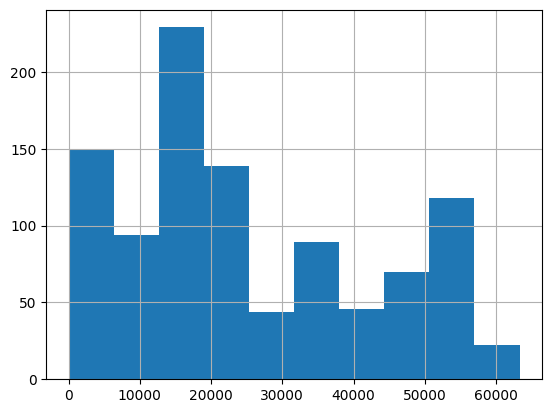

In [65]:
cars['riders'].hist() #.head(2).columns

In [66]:
df = cars.copy()

sort_by_list = ['year_to_start', 'year_to_work']
cols2drop = ['random_name' 'target_1', 'target_2']
columns_order_list = ['car_id', 'model', 'car_type', 'fuel_type', 'car_rating', 'year_to_start', 'riders', 'year_to_work'] 

df.sort_values(sort_by_list, ascending = [True, False], inplace=True)
df.drop(cols2drop, axis = 1, inplace = True, errors = 'ignore')
df = df[columns_order_list]

df = df[~(
        (df['riders'] > 10_000)| 
        (df['car_type'].isin(['standart', 'economy']))
)]

result = df#['car_id']

result#.shape

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
97,I-6078407r,Mini Cooper,business,petrol,4.26,2014,316,2022
917,E20835455V,Volkswagen ID.4,premium,electro,4.02,2014,1553,2022
155,M11365581B,Audi A3,premium,petrol,3.58,2014,1602,2021
748,s12159189K,Mercedes-Benz GLC,business,petrol,4.38,2014,3659,2021
755,B-1733560S,Audi A3,premium,petrol,6.44,2014,2541,2021
609,G74822879i,MINI CooperSE,business,electro,4.00,2014,2524,2020
651,W-1818049g,Audi Q3,premium,petrol,4.80,2014,298,2020
933,b-1560879E,MINI CooperSE,business,electro,3.90,2014,2713,2020
213,T18127969L,Fiat 500,business,petrol,3.64,2014,3335,2019
407,q-7310362e,Mini Cooper,business,petrol,4.52,2014,7323,2019


## Задача 4. Сложная фильтрация

Объект `pd.DataFrame()` помещен в переменную `df1`. Второй объект `pd.DataFrame()` помещен в переменную `df2`. Обе таблицы имеют одинаковый набор столбцов - `car_id`, `rating`, `stop_times` и другие

* Нужно соеденить эти две таблицы вместе.
* Оставить только строки, где `rating >  4` и `stop_times` равен 3 или 5.
* В этом получившемся датафрейме нужно оставить только те строки где `car_id` входит в список `car_black_list` или `user_id` не входит в список `user_white_list`. 
* Нужно оставить только строки, где `index` четное число (датафрейм проиндексирован целыми числами)
* Итоговый объект `pd.DataFrame()` поместите в переменную `result`. 

__На вход подается:__

`df1` - полный `DataFrame` с исходными данными

`df2` - полный `DataFrame` с исходными данными

__На выходе принимается:__

`result:pd.DataFrame()`





In [73]:
rides.head(2)
#your code

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,q53527020Q,g55775125g,i1O,2020-01-16,3.42,33,324,75,100.298135,0,2412.859858,0,-3.828166,-12.577
1,X72952203K,Y-6420899e,Z1i,2020-01-19,4.00,65,839,51,78.000000,0,2553.283971,0,-0.166199,-5.850


In [104]:

car_black_list = rides.sample(5100, random_state = 7)['car_id'].unique().tolist()
user_white_list = rides.sample(5100, random_state = 5)['user_id'].unique().tolist()

df1 = rides.sample(500, random_state = 75).copy()
df2 = rides.sample(500, random_state = 75).copy()


df = pd.concat([df1, df2], axis=0)
df = df[(df['rating'] > 4) & (df['stop_times'].isin([3, 5]))]
df = df[(df['user_id'].isin(user_white_list))&(~df['car_id'].isin(car_black_list))]

df = df[df.index %2 == 0]

restul  = df

restul

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
14268,i16921034C,I-1991173O,Q1j,2020-02-22,4.3,60,713,45,73.0,5,2679.327682,0,-29.588348,-3.609
14268,i16921034C,I-1991173O,Q1j,2020-02-22,4.3,60,713,45,73.0,5,2679.327682,0,-29.588348,-3.609


## Задача 5. Функции

Объект `pd.DataFrame()` помещен в переменную `df`.

Запишите в переменную `mean_rating` среднее по столбцу `rating` .

* Увеличьте на один все значения в столбцах `car_rating` и `year_to_work`.
* Отфильтруйте одним из удобных способов машины с рейтингом выше среднего из переменной `rating`.
* Преобразуйте столбец `year_to_work` следующем образом. Если значение меньше `2017`, то прибавьте `2`, иначе разделите значение на `5` нацело!.
* Переименуйте столбец `year_to_start` в `new_year_to_start` и удалите столбец `fuel_type`.
* Ко всем значениям из столбца `car_type` добавьте приставку `super_`. (`standart` -> `super_standart`)
* Решение запишите в переменную `result`. 

__На вход подается:__

`df` - полный `DataFrame` с исходными данными

__На выходе принимается:__

`mean_age` = среднее по столбцу `'age'`

Новый датафрейм в переменной `result`

Series `id` животных.



In [119]:
df = cars.copy()


#your code

mean_rating = df['car_rating'].mean()

df['car_rating'] = df['car_rating'] + 1
df['year_to_work'] = df['year_to_work'] + 1

df = df[df['car_rating'] > mean_rating]

f = lambda x: x+2 if x < 2017 else x//5
df['year_to_work'] = df['year_to_work'].apply(f)

df.rename(columns = {'year_to_start' : 'new_year_to_start'}, inplace = True)
df.drop('fuel_type', axis=1, inplace=True)

f = lambda x: f'super_{x}'
df['car_type'] = df['car_type'].apply(f)

result = df

result.sample(5)

,car_id,model,car_type,car_rating,new_year_to_start,riders,year_to_work,target_1,target_2
914,I57428032C,Kia Rio,super_economy,4.68,2014,4478,404,0,break_bug
511,J-1696019A,VW Polo VI,super_economy,6.34,2011,50000,403,0,another_bug
192,J15828604G,Renault Kaptur,super_standart,4.38,2013,16840,403,0,electro_bug
825,s-2932726X,Kia Rio X-line,super_economy,5.82,2014,100,403,0,engine_overheat
407,q-7310362e,Mini Cooper,super_business,5.52,2014,7323,404,0,another_bug


## Задача 6. Работа с функциями

Объект `pd.DataFrame()` помещен в переменную `df`.


* Добавьте столбец `flag`, который равен `good_line` если `rating > 5 and speed_max < 100`, `bad_line` если `rating > 5 and speed_max > 100`, `undefined` в остальных случаях
* Добавьте столбец `speed_check`, который принимает значения `avg_more` если `distance/ride_duration >  speed_avg`, иначе `avg_less`.
* Удалите столбцы из списка `cols2drop`. 
* Удалите строки, в которых `car_id` имеет пустые значения.

<!-- Заполните таблицу числовыми значениями. Какой столбец содержит наибольшее кол-во построчно максимальных значений? Возможно столбцы с одинаковым кол-вом построчно максимальных значений, в данном примере берется "первый". -->

Результат запишите в переменную result

__На вход подается:__

`df` - полный `DataFrame` с исходными данными

__На выходе принимается:__
Переменная result с номером столбца

In [168]:
# 'user_id', 'car_id', 'ride_id'
cols2drop = ['ride_cost', 
             'stop_times', 'distance', 'refueling',
            'deviation_normal', 'user_ride_quality']

df = rides.copy()
df.loc[df.sample(frac=0.955).index, 'car_id'] = None


def make_flag(row):
    if row['rating'] > 5 and row['speed_max'] < 100:
        return 'good_line'
    elif row['rating'] > 5 and row['speed_max'] > 100:
        return 'bad_line'
    return 'undefined'
    
    
def make_flag_2(row):
    if row['distance']/row['ride_duration'] >  row['speed_avg']:
        return 'avg_more'
    
    return 'avg_less'


df['flag'] = df.apply(make_flag, axis=1)
df['speed_check'] = df.apply(make_flag_2, axis=1)


df.drop(cols2drop, axis=1, inplace=True)
df.dropna(subset = ['car_id'], inplace=True)

result = df

result.head()
#your code

,user_id,car_id,ride_id,ride_date,rating,ride_duration,speed_avg,speed_max,flag,speed_check
8,w32247420J,I-2277714Y,t1N,2020-02-08,0.10,168,66,116.000000,undefined,avg_less
57,K17905677S,G22045309C,L1f,2020-02-27,5.75,14,53,67.384200,good_line,avg_more
67,k15811096p,Q-1815410s,h1S,2020-02-14,4.21,42,31,62.000000,undefined,avg_less
87,f94879389j,g12681410f,r1P,2020-03-21,6.47,27,78,101.387476,bad_line,avg_more
88,V17636915q,Y54592539J,N1U,2020-02-07,8.81,99,27,37.681724,good_line,avg_less


## Задача 7. Заполнение и редактирование таблиц 

Объект `pd.DataFrame()` помещен в переменную `df`.

* Посчитайте колличество пропусков в каждой строке и запишите это в новый столбец `nans_num`
* Удалите строки, где колличество пропусков больше `2`.
* Удалите строки, где `age` имеет пропущенные значения.
* Заполните пропущенные значения в столбце `user_time_accident` медианным значением.  
* Оставьте только столбцы `age`, `user_rides`, `user_time_accident`
* ??? В получившемся  `DataFrame` надо оставить только столбцы (через функцию `df.reindex` со списком столбцов) `animal`, `name` и `zoo` ? 

Решение запишите в переменную `result`, `mean_age`.

__На вход подается:__

`df` - полный `DataFrame` с исходными данными

__На выходе принимается:__
Два значения: `result`, `mean_age`

In [174]:
driver.head(2)

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19


In [14]:
cols2be = ['age', 'user_rides', 'user_time_accident']

df = driver.copy()

accident_median = df['user_time_accident'].mean()

df.loc[df.sample(frac=0.25).index, 'age'] = None
df.loc[df.sample(frac=0.25).index, 'user_rating'] = None
df.loc[df.sample(frac=0.55).index, 'user_rides'] = None
df.loc[df.sample(frac=0.25).index, 'user_time_accident'] = None

df['nans_num'] = df.isnull().sum(axis=1)
df = df[df['nans_num'] <= 2]
df = df[~df['age'].isnull()] # или dropna()

df['user_time_accident'] = df['user_time_accident'].fillna(accident_median)

df = df[cols2be]

result = df

result.head()
#your code


#your code

,age,user_rides,user_time_accident
0,27.0,NaN,19.000000
2,59.0,NaN,4.000000
3,37.0,NaN,4.000000
4,39.0,NaN,10.072235
5,21.0,NaN,22.000000


0        1
1        1
2        3
3        0
4        2
        ..
15148    3
15149    2
15150    2
15151    3
15152    1
Length: 15153, dtype: int64

## Задача 8. Работа со статистиками

Объект `pd.DataFrame()` помещен в переменную `df`.

Заполним датафрейм например как

`df = pd.DataFrame(data=np.arange(start=1, stop=21), columns=['data'])`

Убрать верхние и нижние 5% от объекта DataFrame. 

__На вход подается:__

`df` - полный `DataFrame` с исходными данными

__На выходе принимается:__

Новый датафрейм в переменной `'result'`





In [ ]:
#your code